In [258]:
from IPython.display import Audio
import matplotlib.pyplot as plt 
import numpy as np
import librosa
from scipy.fftpack import rfft, irfft, fftfreq, fft, rfftfreq,ifft
from scipy import signal

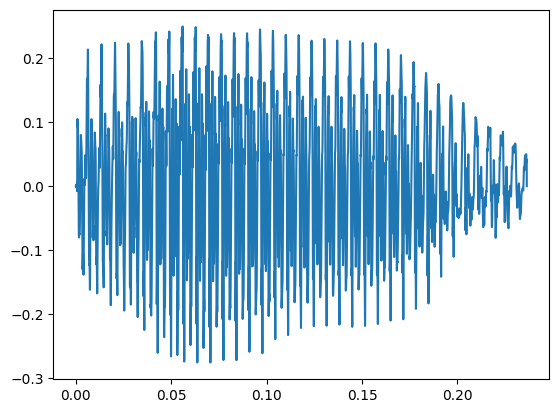

In [259]:
path = 'BarredO.wav'
window = 100
audio, sample_rate = librosa.load(path,offset=0.73)

time = np.linspace(0,(1/sample_rate)*len(audio),len(audio))

plt.plot(time,audio)
plt.show
Audio(audio, rate = sample_rate)

<function matplotlib.pyplot.show(close=None, block=None)>

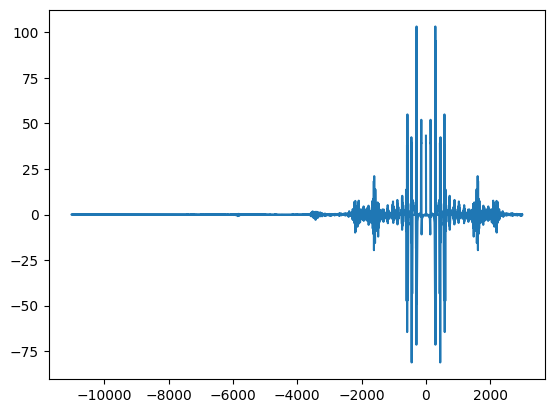

In [260]:
audio_fft = fft(audio)
mag = abs(audio_fft)
phase = np.angle(audio_fft)
sample_period = 1/sample_rate
W=fftfreq(mag.size,sample_period)
plt.plot(W[W<3000],audio_fft[W<3000])
plt.show

In [261]:
def func_fft(audio, sample_rate):
    audio_fft = fft(audio)
    mag = abs(audio_fft)
    phase = np.angle(audio_fft)
    W = fftfreq(audio.size,1/sample_rate)
    return mag, phase, W

def inverse(amp,phase):
    combined=np.multiply(amp,np.exp(1j*phase))
    inverse_combined=ifft(combined)
    signal=np.real(inverse_combined)
    return signal


def get_ranges(audio_fft, W, sample_rate, window):

    sample_period = 1/sample_rate
    W=fftfreq(audio.size,sample_period)
    clean_freq = []
    fig_f = []
    fig_a = []
    window = window
    average = sum(abs(audio_fft))/len(audio_fft)
    average = sum(abs(audio_fft[audio_fft>average]))/len(audio_fft[audio_fft>average])
    for i in range(len(W)):
        if audio_fft[i] > average:
            if not clean_freq:
                clean_freq.append((W[i]-window,W[i]+window))
                fig_f.append(W[i])
                fig_a.append(audio_fft[i] )
            if clean_freq:
                if W[i] > clean_freq[-1][1]:
                    clean_freq.append((W[i]-window,W[i]+window))
                    fig_f.append(W[i])
                    fig_a.append(audio_fft[i])
                elif audio_fft[i]> fig_a[-1]:
                    
                    clean_freq.pop(-1)
                    clean_freq.append((W[i]-window,W[i]+window))
                    fig_f.pop(-1)
                    fig_a.pop(-1)
                    fig_f.append(W[i])
                    fig_a.append(audio_fft[i])


    
    plt.plot(W[W<4000],audio_fft[W<4000])
    plt.scatter(fig_f,fig_a, color="red")
    return clean_freq

[(-100.0, 100.0),
 (48.10017271157167, 248.10017271157167),
 (196.20034542314335, 396.20034542314335),
 (344.300518134715, 544.300518134715),
 (488.16925734024176, 688.1692573402418),
 (636.2694300518134, 836.2694300518134),
 (1512.1761658031087, 1712.1761658031087),
 (-1712.1761658031087, -1512.1761658031087),
 (-1585.2331606217615, -1385.2331606217615),
 (-836.2694300518134, -636.2694300518134),
 (-688.1692573402418, -488.16925734024176),
 (-544.300518134715, -344.300518134715),
 (-396.20034542314335, -196.20034542314335),
 (-248.10017271157167, -48.10017271157167)]

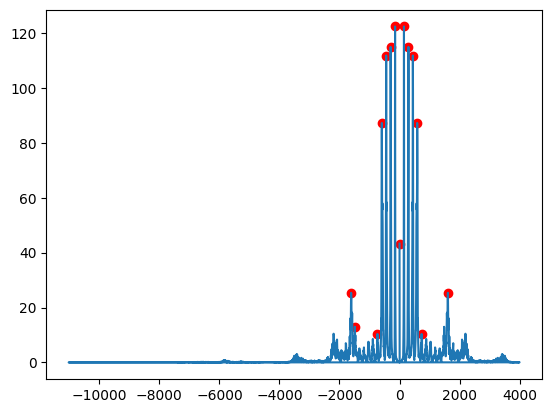

In [262]:
mag, phase, W = func_fft(audio,sample_rate)
ranges = get_ranges(mag, W,sample_rate,window)
ranges

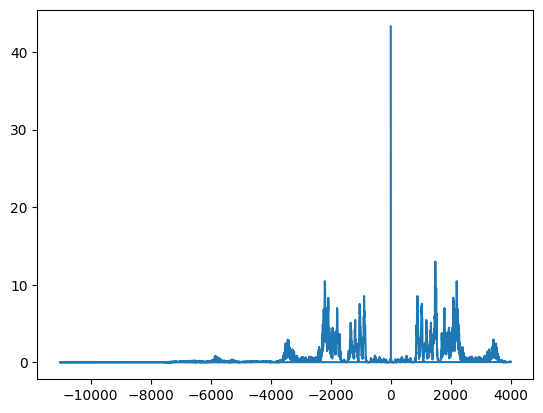

In [264]:
trimed = remove_ranges(mag, W, ranges,window)
audio_final = inverse(trimed,phase)
f, t, Sxx = signal.spectrogram(audio_final, sample_rate)

Audio(audio_final, rate = sample_rate)

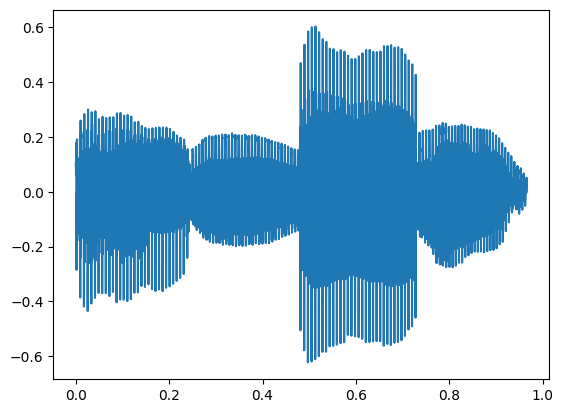

In [265]:
path = 'allmixed.wav'
audio, sample_rate = librosa.load(path)

time = np.linspace(0,(1/sample_rate)*len(audio),len(audio))

plt.plot(time,audio)
plt.show
Audio(audio, rate = sample_rate)

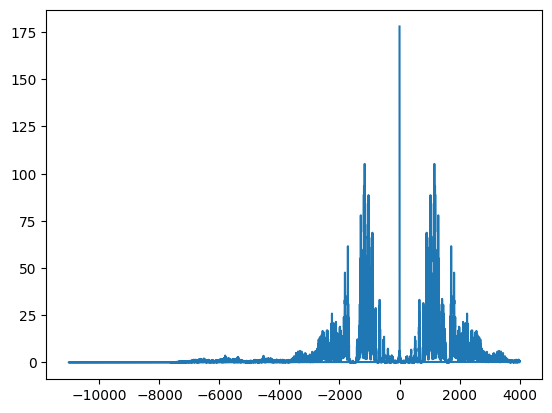

In [266]:
mag, phase, W = func_fft(audio,sample_rate)
trimed = remove_ranges(mag, W, ranges,window)
audio_final = inverse(trimed,phase)
f, t, Sxx = signal.spectrogram(audio_final, sample_rate)

Audio(audio_final, rate = sample_rate)

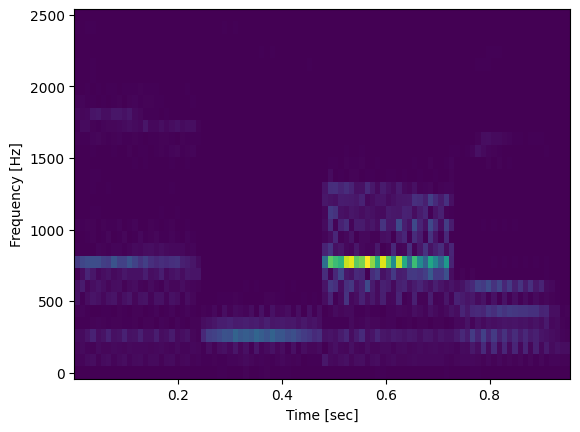

In [267]:
f, t, Sxx = signal.spectrogram(audio, sample_rate)
plt.pcolormesh(t, f[f<2500], Sxx[f<2500])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

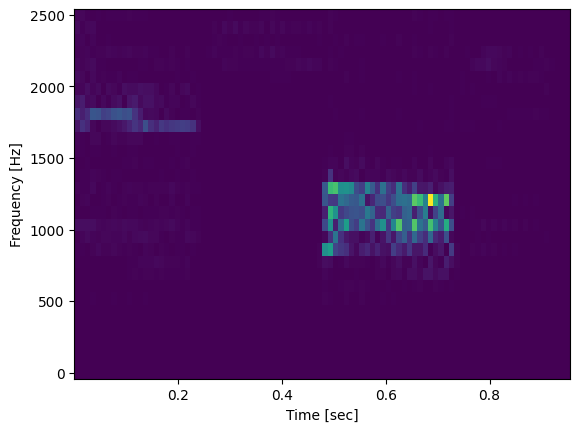

In [268]:
f, t, Sxx = signal.spectrogram(audio_final, sample_rate)
plt.pcolormesh(t, f[f<2500], Sxx[f<2500])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

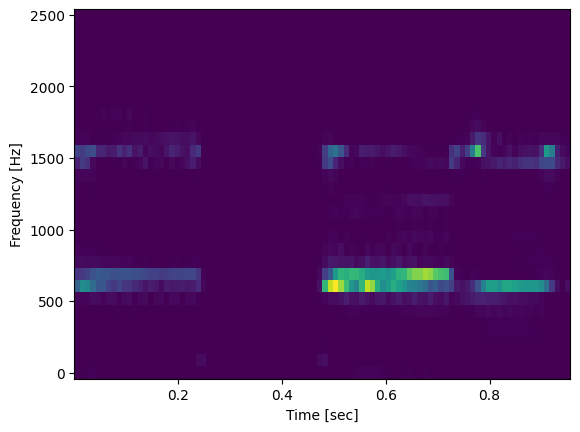

In [133]:
f, t, Sxx = signal.spectrogram(audio_final, sample_rate)
plt.pcolormesh(t, f[f<2500], Sxx[f<2500])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

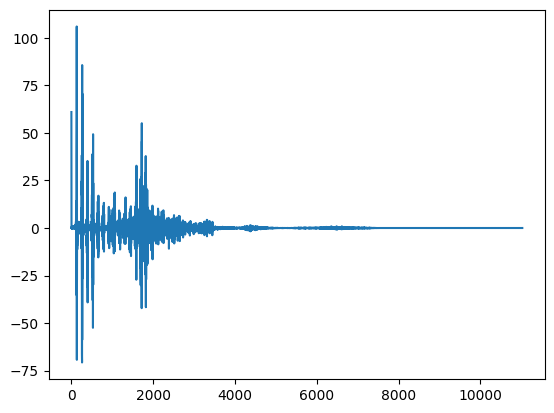

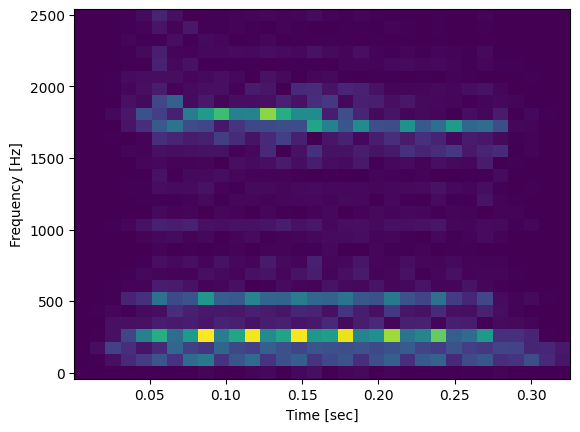